# Лабораторная работа №2 «Оптимизация потерь в задачах классификации»

## Описание

### Примечание

В столбцах `prediction1`, `prediction2`, `prediction3` файла `data.csv` содержатся результаты предсказания соответствия классу 1 некоторых классификаторов (трех вариантов глубокой нейронной сети) для тестовой выборки. Столбец `label` содержит истинные классы объектов. 


### Задание 1
  
Постройте кривую ошибок для каждой нейросети. Чем они отличаются? Площадь под какой кривой больше? Трансформируйте предсказания нейросетей в вероятности класса 1 (далее будем обозначать их `probabilities`), предполагая, что тестовая выборка распределена точно так же, как и будут распределены объекты в будущем, к которым наш алгоритм планируется применять. Для этого можно действовать следующим образом. Для каждого значения, возвращаемого нейросетью, взять несколько похожих значений и вычислить среди них процент класса 1, т.е. по сути применить метод ближайших соседей к данным: `x` - предсказания нейросети, `y` - истинные классы. Постройте на одном графике зависимости вероятностей от величины предсказания для всех нейросетей.



### Задание 2

Для каждой из нижеследующих задач на листике составьте таблицу потерь/прибыли в результате ошибочных/правильных ответов алгоритма (первая строка таблицы - вероятности исходов, остальные - потери/прибыль от каждого действия алгоритма, одна строка - одно действие). Для этого придумайте/найдите в интернете разумные величины штрафов и напишите их словесное обоснование (т.е. восполните недостающие данные в постановке задачи). Теоретически (на листике) найдите зависимость оптимального порогового значения от вероятности для каждой из нейросетей (это называется decision function). Запрограммируйте найденное пороговое значение и выясните, какие из нейросетей рентабельны и какие приносят наибольшую прибыль?

1. Задача выдачи кредита размером 1 млн. руб на 1 год. probabilities - вероятности возврата кредита клиентами. Ставка по кредиту: 4%. Ответьте на вопрос, следует ли в этой задаче учитывать "упущенную выгоду", есть ли в статистике обычного банка необходимые для этого данные? 

2. Задача предсказания существенного взлета/падения курса валюты в течении следующей недели более чем на 5%. Предполагается, что в выборку были добавлены только те промежутки времени, в течении которых произошло изменение курса более чем на 5%, причем 1 означает рост курса валюты, 0 - падение. Предположите для простоты, что операции покупки/продажи вы можете совершать каждую неделю, своих денег у вас нет, для каждой операции вам нужно занимать деньги у друга и в конце недели возвращать ему занятую сумму (без процентов).

3. Задача предсказания определенного типа онкологии в частной клинике. probabilities - вероятность плохого диагноза. Алгоритм должен принять решение: а) лечить от онкологии опасными средствами, б) лечить от похожей болезни безопасными методами, в) отказаться от лечения. Лечение опасно (с вероятностью 60% пациент станет инвалидом III группы), но существенно продлевает жизнь. Сначала получите решение без учета репутационных потерь клиники, а потом с ними.

4. Задача определения оптимальной цены страховки в зависимости от вероятности (probabilities) клиента попасть в аварию с ценой ремонта более 20 тыс. руб в будущем году. Для каждого клиента ответьте на вопрос какая нейросеть лучше (экономически выгодней)? Для скольки процентов клиентов лучшей оказалась первая нейросеть (вторая, третья)?

5. Разработка медицинского теста коронавируса, который будет использоваться в качестве официального (т.е. в случае положительного результата человека отправляют на больничный (1 неделя), выдают бесплатно лекарства и бесплатно проводят дезинфекцию в квартире).
  
6. Задача предсказания брака изделия (стоимость изделия - 10 тыс руб). Сначала получите решение без учета репутационных потерь компании, а потом с ними. 



### Полезные кусочки кода

#### Построение кривой ошибок расчет площади под ней:

```python
fpr, tpr, _ = sklearn.metrics.roc_curve(true_class, prediction)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()
print('Площадь под кривой =', sklearn.metrics.roc_auc_score(true_class, prediction) )
```

#### Продвинутый алгоритм вычисления вероятностей - метод парзеновского окна:

```python
from statsmodels.nonparametric.kernel_regression import KernelReg
kr = KernelReg(endog=y, exog=x, var_type='c', bw=[0.2])
prob, _ = kr.fit(x)
```

## Работа

In [51]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.20f' % x)
import sklearn.metrics  # noqa: E402
import matplotlib.pyplot as plt  # noqa: E402
from statsmodels.nonparametric.kernel_regression import KernelReg  # noqa: E402

In [52]:
data = pd.read_csv("data.csv", delimiter=',')
data.describe()

,prediction1,prediction2,prediction3,label
count,10000.00000000000000000000,10000.00000000000000000000,10000.00000000000000000000,10000.00000000000000000000
mean,-0.00000000000000002913,-0.00000000000000002842,-0.00000000000000004547,0.52029999999999998472
std,0.57743687966940049350,0.57743687966940049350,0.57743687966940049350,0.49961272130233902455
min,-1.00000000000000000000,-1.00000000000000000000,-1.00000000000000000000,0.00000000000000000000
25%,-0.50000000000000011102,-0.50000000000000011102,-0.50000000000000011102,0.00000000000000000000
50%,-0.00000000000000010000,-0.00000000000000010000,-0.00000000000000010000,1.00000000000000000000
75%,0.49999999999999994449,0.49999999999999994449,0.49999999999999994449,1.00000000000000000000
max,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000,1.00000000000000000000


### Задание 1

In [53]:
def plot_roc_curve(prediction, true_class, axis, label):
    fpr, tpr, _ = sklearn.metrics.roc_curve(true_class, prediction)
    axis.plot(fpr, tpr, color='darkorange', lw=2, label=label)
    axis.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    area = sklearn.metrics.roc_auc_score(true_class, prediction)
    axis.set_title(f"A = {area}")
    axis.legend()
    # print('Площадь под кривой =', sklearn.metrics.roc_auc_score(true_class, prediction))

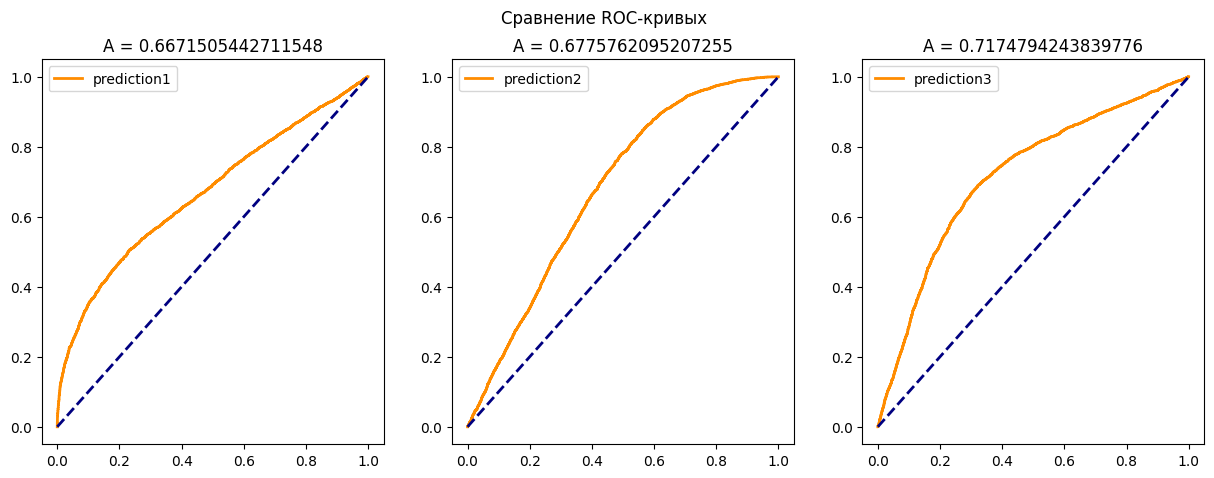

In [54]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))

plot_roc_curve(data['prediction1'], data['label'], axes[0], 'prediction1')
plot_roc_curve(data['prediction2'], data['label'], axes[1], 'prediction2')
plot_roc_curve(data['prediction3'], data['label'], axes[2], 'prediction3')

plt.suptitle("Сравнение ROC-кривых")

plt.show()

In [55]:
def kernel_regression(x, y):
    kr = KernelReg(endog=y, exog=x, var_type='c', bw=[0.2])
    prob, _ = kr.fit(x)
    return prob

In [56]:
probabilities1 = kernel_regression(data['prediction1'], data['label'])
probabilities2 = kernel_regression(data['prediction2'], data['label'])
probabilities3 = kernel_regression(data['prediction3'], data['label'])

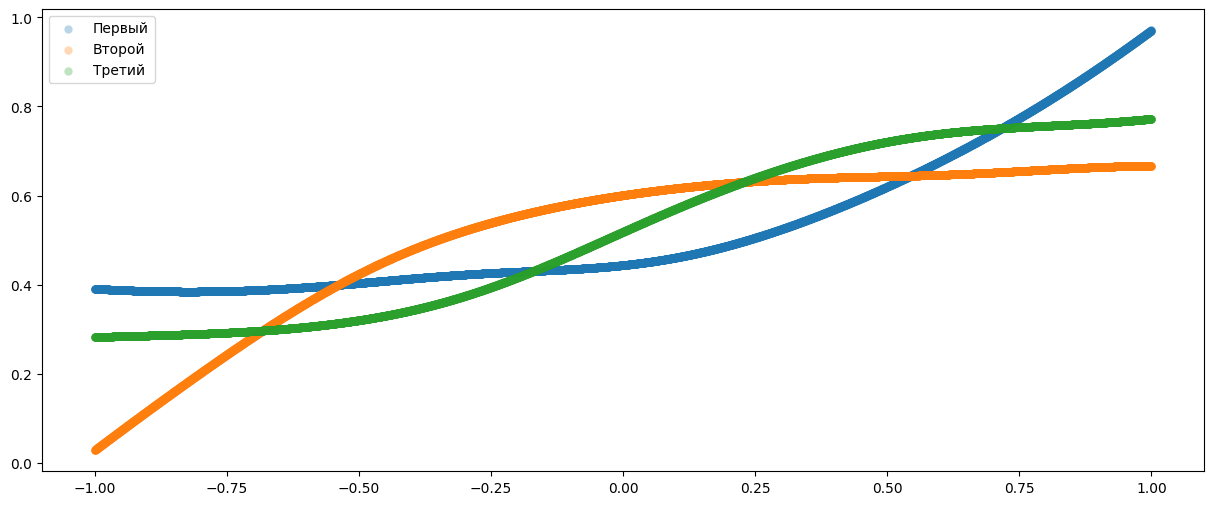

In [57]:
plt.figure(figsize=(15, 6))
plt.scatter(data['prediction1'], probabilities1, label='Первый', alpha=0.3, linewidth=0.001)
plt.scatter(data['prediction2'], probabilities2, label='Второй', alpha=0.3, linewidth=0.001)
plt.scatter(data['prediction3'], probabilities3, label='Третий', alpha=0.3, linewidth=0.001)
# plt.xlim(-1, -0.75)
# plt.ylim(0.38, 0.41)
plt.legend()
plt.show()

### Задание 2